In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy import odr
plt.rcParams["figure.figsize"]=10,5

In [48]:
def my_round(X , DX) :

    if np.log10(DX)>0 : 
        Ndecimal = 1 - np.int(np.ceil(np.abs(np.log10(DX))))
    else : 
        Ndecimal = np.int(np.ceil(np.abs(np.log10(DX))))
    
    if Ndecimal == 0 : 
        DX = np.int(np.around( DX , Ndecimal ))
        X = np.int(np.around( X , Ndecimal ))
    else : 
        DX = np.around( DX , Ndecimal )
        X = np.around( X , Ndecimal )
        
    return X , DX

def Linear(P,x) : 
    return P[0] * x

Diffraction faisceau e- par du graphite

In [25]:
# Constantes Physiques : 

me = 9.11 * 10**(-31) # Masse de l'e- en (kg)
e = 1.60 * 10**(-19)  # Charge élémentaire (C)
h = 6.63 * 10**(-34)  # Constante de Planck (J.s)


# Données Expérimentales : 

L = 0.135    # Longueur du tube (m) 
L_err = 0.001



In [5]:
ls -lrt

total 28176
-rw-r--r--@ 1 Johany  staff   195311 Apr  1 14:21 LP36 - Fiche de correction.pdf
-rw-r--r--@ 1 Johany  staff   281295 Apr  3 00:36 LP20___Diffraction_par_des_structures_p_riodiques.pdf
-rw-r--r--@ 1 Johany  staff  4797294 Apr  6 12:55 Cristallo.jpg
-rw-r--r--@ 1 Johany  staff  1127384 Apr  7 23:55 P93.6ab_Tube pour la diffraction d'électrons (555 626)_LEYBOLD.pdf
-rwxr-xr-x@ 1 Johany  staff  4923349 Apr  8 00:00 Diapo.key*
-rw-r--r--@ 1 Johany  staff  2555755 Apr  8 00:10 Manip.jpg
-rw-r--r--  1 Johany  staff     2766 Apr  8 11:00 Untitled.ipynb
-rw-r--r--  1 Johany  staff     9560 Apr  8 11:25 Diffraction_electron.ods
-rw-r--r--  1 Johany  staff      211 Apr  8 11:26 Diffraction_electron.csv


In [6]:
# Formatage du fichier csv le cas echeant : 
catinit= open('Diffraction_electron.csv','r').read()
print (catinit)

U(kV),U_err,D1(mm),D1_err,D2(mm),D2_err
1.0,0.01,49,1,85,1
1.5,0.01,40,1,69,1
2.0,0.01,35,1,60,1
2.5,0.01,31,1,52,1
3.0,0.01,28,1,50,1
3.5,0.01,26,1,44,1
4.0,0.01,25,1,43,1
4.5,0.01,23,1,39,1
5.0,0.01,22,1,38,1



In [7]:
catinit=catinit.replace(',',' ') #Delimiter 

cat = open('rdy2go.txt','w')
cat.write(catinit)
cat.close()

In [8]:
# Lecture du fichier Formate 
Cat = np.genfromtxt('rdy2go.txt',dtype=[('U',np.float) , ('U_err',np.float) , ('D1',np.float) , ('D1_err',np.float), ('D2',np.float) , ('D2_err',np.float)],skip_header=1)

Cat['U'] = Cat['U']*1000. # Conversion Tension kV -> V
Cat['U_err'] = Cat['U_err']*1000.

Cat['D1'] = Cat['D1']/1000. # Conversion Taille anneau mm -> m
Cat['D1_err'] = Cat['D1_err']/1000.
Cat['D2'] = Cat['D2']/1000. # Conversion Taille anneau mm -> m
Cat['D2_err'] = Cat['D2_err']/1000.



In [9]:
## Préparation des données pour ajustement : 

# Calcul de la longueur d'onde de De Broglie des electrons : 

Lambda = h/np.sqrt(2*me*e*Cat['U'])

Lambda_err = np.abs( (1/2) * Lambda * (Cat['U_err']/Cat['U']) )



In [14]:
## Ajustement des données par le modèle D = A*Lambda

myModel = odr.Model(Linear)

# Pour D1

mydata1 = odr.RealData(x=Lambda,y=Cat['D1'],sx=Lambda_err,sy=Cat['D1_err'])

myodr1 = odr.ODR(mydata1, myModel,beta0=[0.])

myoutput1 = myodr1.run()

print(myoutput1.beta)
print(myoutput1.sd_beta)
print('_______')

# Pour D2

mydata2 = odr.RealData(x=Lambda,y=Cat['D2'],sx=Lambda_err,sy=Cat['D2_err'])

myodr2 = odr.ODR(mydata2, myModel,beta0=[0.])

myoutput2 = myodr2.run()

print(myoutput2.beta)
print(myoutput2.sd_beta)
print('_______')



[1.2633657e+09]
[3303705.46199421]
_______
[2.17504332e+09]
[12089892.11800962]
_______


<IPython.core.display.Javascript object>


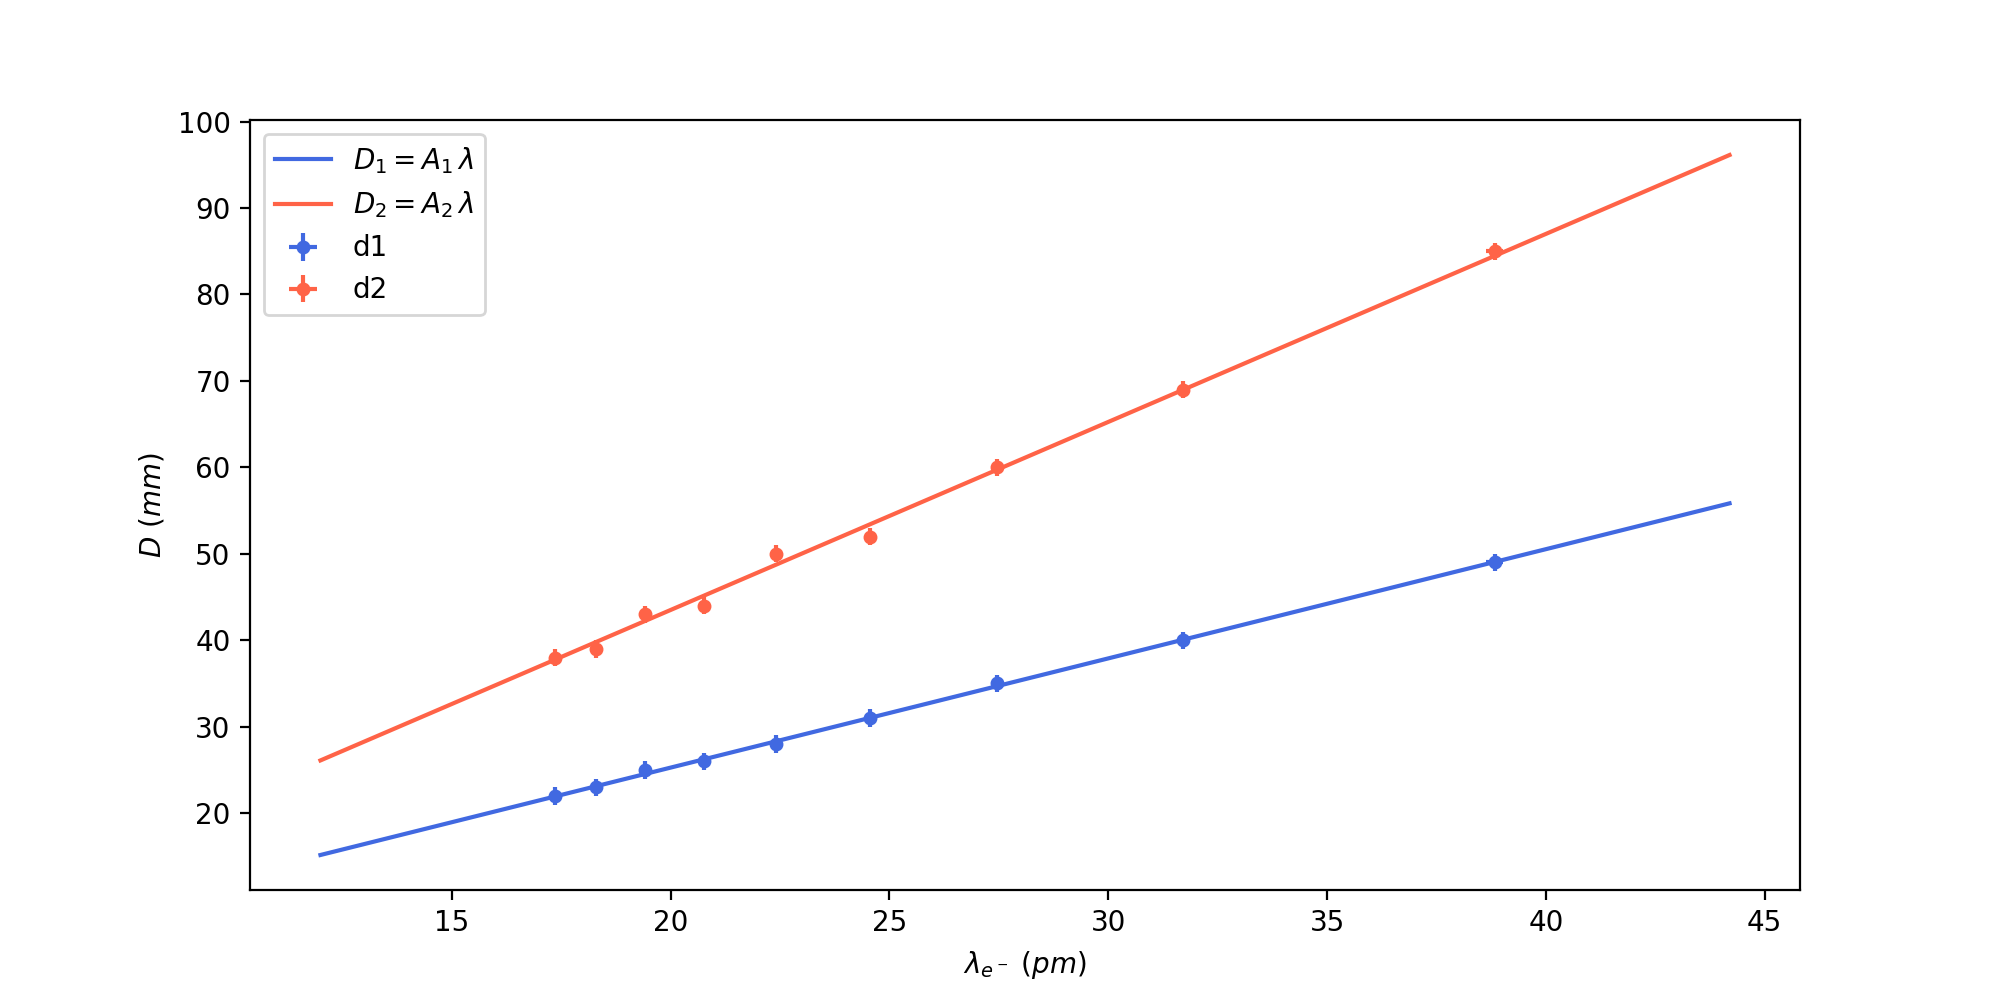

In [54]:
# Plot resultat : 

Xrange = 1.5*(np.max(Lambda) - np.min(Lambda))
Xmin = (np.max(Lambda) + np.min(Lambda))/2. - 0.5*Xrange
Xmax = (np.max(Lambda) + np.min(Lambda))/2. + 0.5*Xrange
X = np.arange(Xmin,Xmax,Xrange/100.)


%matplotlib notebook
plt.figure()

plt.xlabel("$\lambda_{e^-} \ (pm)$")
plt.ylabel('$D \ (mm)$')

plt.errorbar( Lambda*10**(12) , Cat['D1']*1000., xerr=Lambda_err*10**(12) , yerr=Cat['D1_err']*1000. , color='royalblue', fmt = 'o',markersize=4, label='d1')
plt.plot (X*10**(12), 1000.* (myoutput1.beta[0]*X), 'royalblue', label='$D_1 = A_1 \, \lambda$')

plt.errorbar( Lambda*10**(12) , Cat['D2']*1000., xerr=Lambda_err*10**(12) , yerr=Cat['D2_err']*1000. , color='tomato', fmt = 'o',markersize=4, label='d2')
plt.plot (X*10**(12), 1000.* (myoutput2.beta[0]*X), 'tomato', label='$D_2 = A_2 \, \lambda$')

# Je multiplie par 1000. les Y et par 10**12 les X pour avoir D en (mm) et Lambda en (pm)

plt.legend()
plt.show()




In [49]:
# Déduction de d1 et d2 sachant que A_i = 2L/d_i

d1 = 2*L/myoutput1.beta[0]   
d1_err = d1 * np.sqrt( (L_err/L)**2 + (myoutput1.sd_beta[0]/myoutput1.beta[0])**2 )

d2 = 2*L/myoutput2.beta[0] 
d2_err = d2 * np.sqrt( (L_err/L)**2 + (myoutput2.sd_beta[0]/myoutput2.beta[0])**2 )


d1_round = my_round(d1*10**12 , d1_err*10**12) # en pm
d2_round = my_round(d2*10**12 , d2_err*10**12) # en pm

print("La distance mesurée d1 entre les plans de la première famille est de :" )
print ('d1 = '+str(d1_round[0])+' +/- '+str(d1_round[1])+' pm')
print ("Pour une valeur tabulée de : ")
print ('d1 = 213 pm')

print('')
print('__________')
print('')

print("La distance mesurée d2 entre les plans de la deuxième famille est de :" )
print ('d2 = '+str(d2_round[0])+' +/- '+str(d2_round[1])+' pm')
print ("Pour une valeur tabulée de : ")
print ('d2 = 123 pm')


La distance mesurée d1 entre les plans de la première famille est de :
d1 = 214 +/- 2 pm
Pour une valeur tabulée de : 
d1 = 213 pm

__________

La distance mesurée d2 entre les plans de la deuxième famille est de :
d2 = 124 +/- 1 pm
Pour une valeur tabulée de : 
d2 = 123 pm


In [51]:
## J'en déduis certains paramètres de la maille : 

# l : 

l = (2/3) * d1 
l_err = (2/3)* d1_err

l_round = my_round(l*10**12 , l_err*10**12) # en pm


# a : 

a = 2 * d2 
a_err = 2 * d2_err

a_round = my_round(a*10**12 , a_err*10**12) # en pm

print("le coté de l'hexagone du feuillet (l) est de : " )
print ('l = '+str(l_round[0])+' +/- '+str(l_round[1])+' pm')
print ("Pour une valeur tabulée de : ")
print ('l = 142 pm')


print('')
print ('___________')
print('')

print("le coté du losange de la base de la maille (a) est de : " )
print ('a = '+str(a_round[0])+' +/- '+str(a_round[1])+' pm')
print ("Pour une valeur tabulée de : ")
print ('a = 246 pm')

le coté de l'hexagone du feuillet (l) est de : 
l = 142 +/- 1 pm
Pour une valeur tabulée de : 
l = 142 pm

___________

le coté du losange de la base de la maille (a) est de : 
a = 248 +/- 2 pm
Pour une valeur tabulée de : 
a = 246 pm


<IPython.core.display.Javascript object>


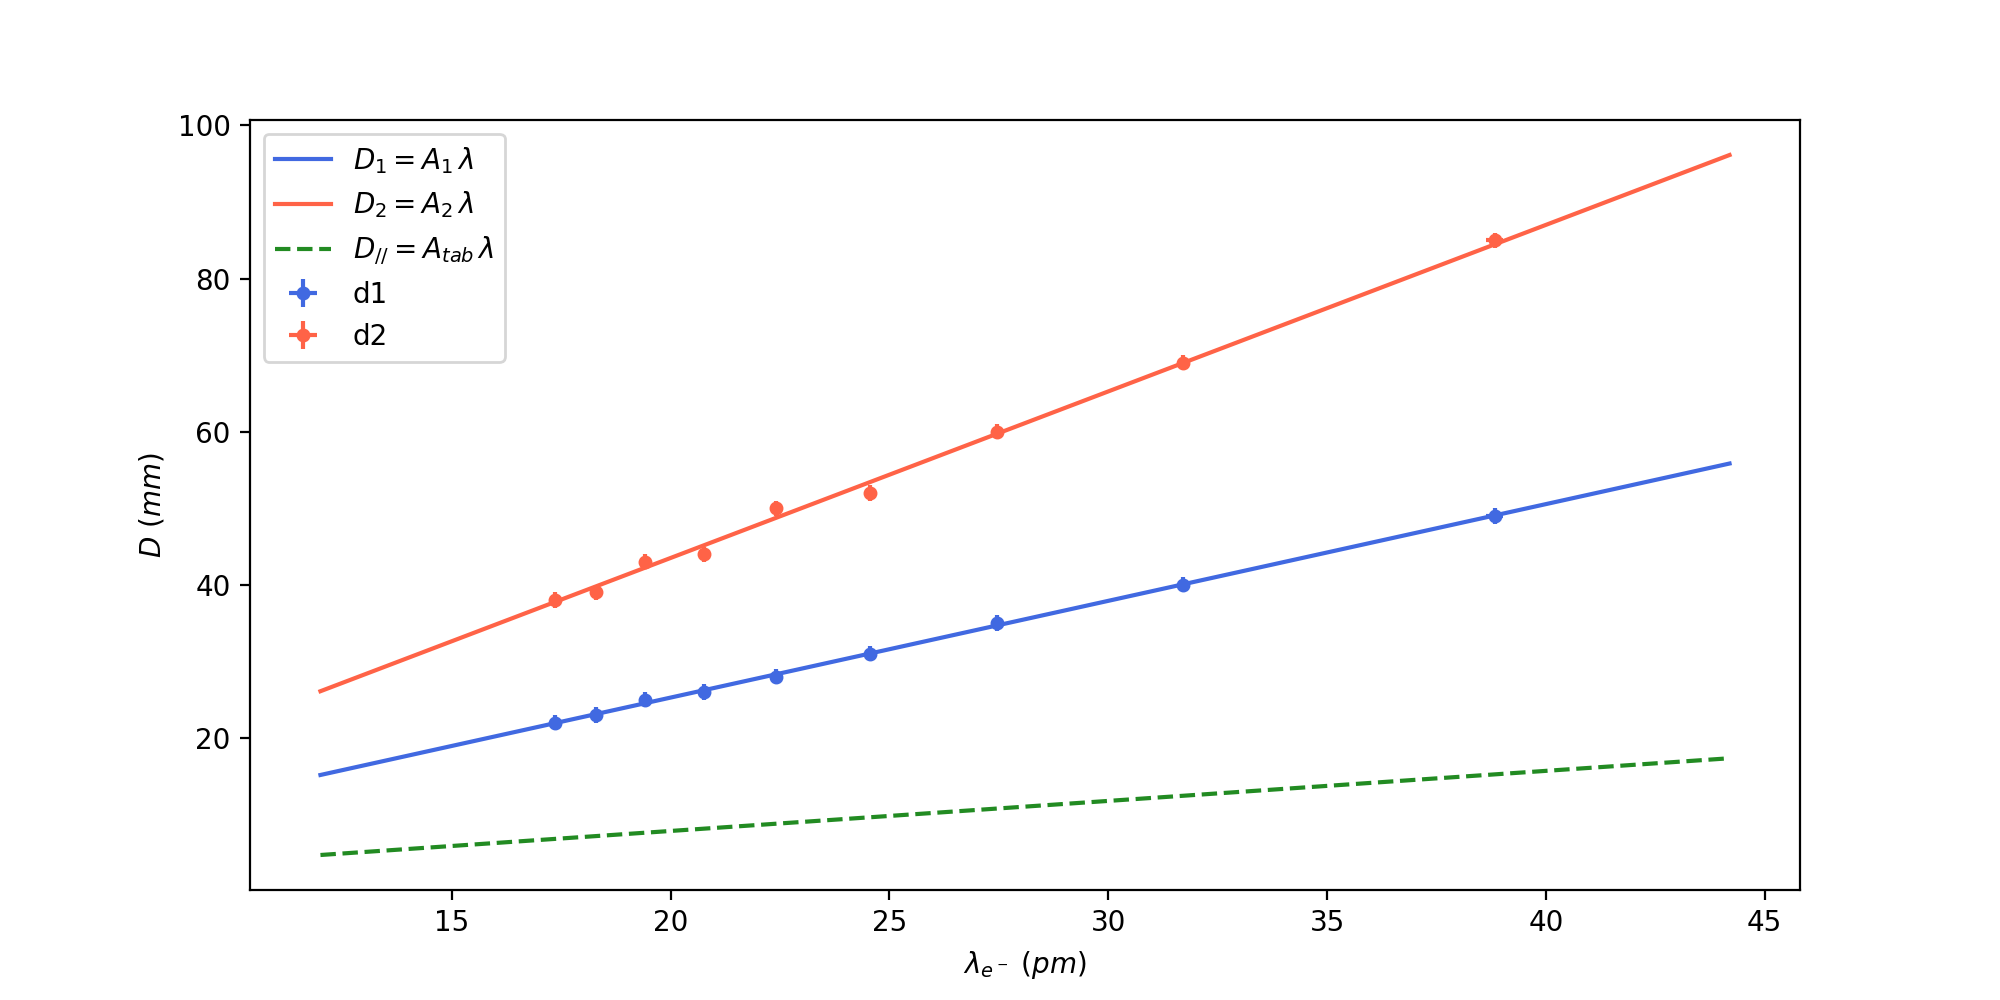

Les extremums obtenus sont : 
15.238937107365238 mm pour U = 1.0 kV
6.815059855382537 mm pour U = 5.0 kV


In [64]:
#### Qu'en est il de la mesure de distance entre la famille de plans // aux feuillets ??? 

d_tab = 688* 10**(-12)  #

A_tab = 2*L / d_tab 

# Plot théorique : 

Xrange = 1.5*(np.max(Lambda) - np.min(Lambda))
Xmin = (np.max(Lambda) + np.min(Lambda))/2. - 0.5*Xrange
Xmax = (np.max(Lambda) + np.min(Lambda))/2. + 0.5*Xrange
X = np.arange(Xmin,Xmax,Xrange/100.)


%matplotlib notebook
plt.figure()

plt.xlabel("$\lambda_{e^-} \ (pm)$")
plt.ylabel('$D \ (mm)$')

plt.errorbar( Lambda*10**(12) , Cat['D1']*1000., xerr=Lambda_err*10**(12) , yerr=Cat['D1_err']*1000. , color='royalblue', fmt = 'o',markersize=4, label='d1')
plt.plot (X*10**(12), 1000.* (myoutput1.beta[0]*X), 'royalblue', label='$D_1 = A_1 \, \lambda$')

plt.errorbar( Lambda*10**(12) , Cat['D2']*1000., xerr=Lambda_err*10**(12) , yerr=Cat['D2_err']*1000. , color='tomato', fmt = 'o',markersize=4, label='d2')
plt.plot (X*10**(12), 1000.* (myoutput2.beta[0]*X), 'tomato', label='$D_2 = A_2 \, \lambda$')

plt.plot (X*10**(12), 1000.* (A_tab*X), 'forestgreen',linestyle='--', label='$D_{//} = A_{tab} \, \lambda$')


# Je multiplie par 1000. les Y et par 10**12 les X pour avoir D en (mm) et Lambda en (pm)

plt.legend()
plt.show()

print("Les extremums obtenus sont : ")
print (str(1000.* (A_tab*(np.max(Lambda))))+' mm pour U = '+str(np.min(Cat['U'])/1000.)+' kV') 
print (str(1000.* (A_tab*(np.min(Lambda))))+' mm pour U = '+str(np.max(Cat['U'])/1000.)+' kV') 

